# lecture

최규빈  
2023-09-11

<a href="https://colab.research.google.com/github/guebin/DV2023/blob/main/posts/02wk-1.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상

In [1]:
# {{<video  >}}

# 2. Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams['figure.figsize'] = (3, 2) 
matplotlib.rcParams['figure.dpi'] = 150

# 3. 객체지향적 시각화 (2)

## A. 예비학습

`# 예비학습1` – 그림을 저장했다가 꺼내보고 싶다.

`-` 그림을 그리고 저장하자.

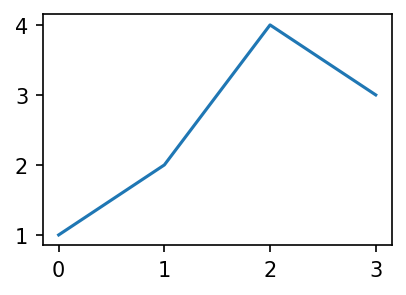

In [8]:
plt.plot([1,2,4,3])
fig = plt.gcf()

`-` 다른그림을 그려보자.

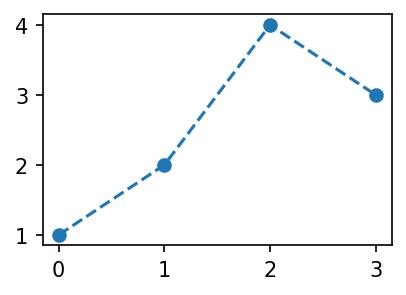

In [9]:
plt.plot([1,2,4,3],'--o')

`-` 저장한 그림은 언제든지 꺼내볼 수 있음

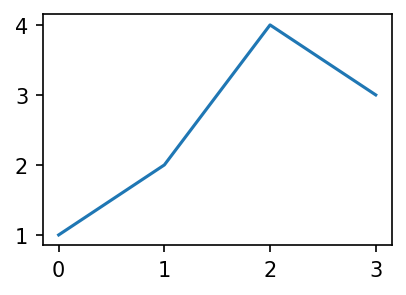

In [10]:
fig

`#`

`# 예비학습2` – fig 는 뭐야?

In [11]:
#fig??
type(fig)

-   `Figure`라는 클래스에서 찍힌 인스턴스

`-` 여러가지 값, 기능이 저장되어 있겠음.

In [12]:
fig.axes

In [13]:
ax = fig.axes[0]

In [14]:
yaxis= ax.yaxis
xaxis= ax.xaxis

In [15]:
lines = ax.get_lines()
line = lines[0]

`-` 계층구조: Figure $\supset$ \[Axes,…\] $\supset$ YAxis, XAxis,
\[Line2D,…\]

In [16]:
type(fig)

**1. `.axes` 로 Axes 를 끄집어냄**

In [17]:
ax = fig.axes[0]
type(ax)

**2. `.xaxis`, `.yaxis` 로 Axis 를 끄집어냄**

In [18]:
yaxis = ax.yaxis
xaxis = ax.xaxis
type(yaxis), type(xaxis)

**3. `.get_lines()`로 Line2D를 끄집어냄**

In [19]:
lines = ax.get_lines()
line=lines[0]
type(line)

`-` 오브젝트내용 확인 (그닥 필요 없음)

In [20]:
line.properties()['data']

`-` matplotlib의 설명

ref:
<https://matplotlib.org/stable/gallery/showcase/anatomy.html#sphx-glr-gallery-showcase-anatomy-py>

![](https://matplotlib.org/stable/_images/sphx_glr_anatomy_001.png)

## B. `plt.plot` 쓰지 않고 그림그리기

`-` 개념:

-   Figure(fig): 도화지
-   Axes(ax): 도화지에 존재하는 그림틀
-   Axis, Lines: 그림틀 위에 올려지는 물체(object)

`-` 목표: 아래와 똑같은 그림을 `plt.plot()`을 쓰지 않고 만든다.

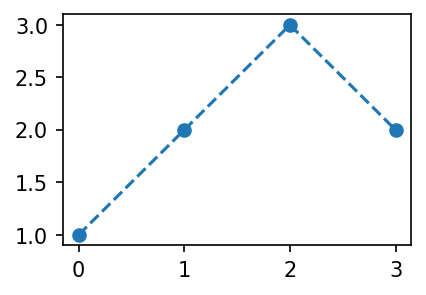

In [27]:
plt.plot([1,2,3,2],'--o')

`-` 아래와 같이 하면 된다.

### 다른방법들

`-` 조금 다른 방법: Line2d 오브젝트를 쓰지 않는 방법

`-` 조금 다른 방법 (2): `add_axes()`를 쓰지 않는 방법

`-` 좀 더 다른 방법 (3)

## C. 정리 ($\star\star\star$)

`-` 결국 아래는 모두 같은 코드이다.

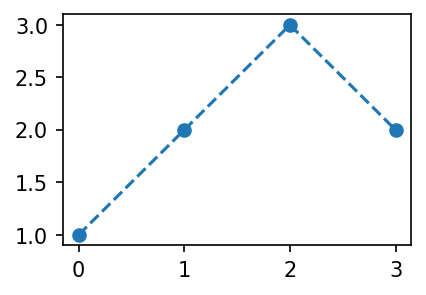

In [67]:
## 코드1 
plt.plot([1,2,3,2],'--o')

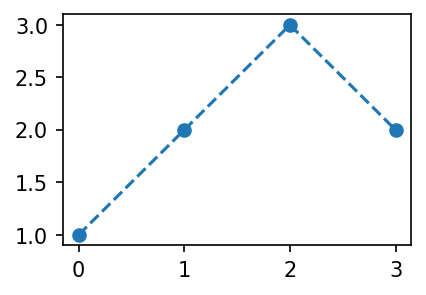

In [68]:
## 코드2
fig,ax = plt.subplots()
ax.plot([1,2,3,2],'--o')

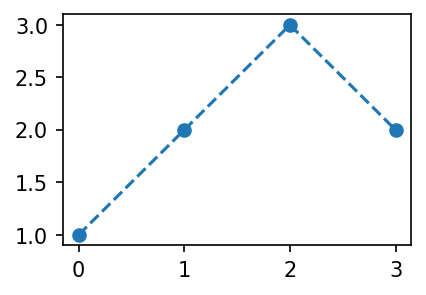

In [69]:
## 코드3
fig = plt.Figure()
ax = fig.subplots()
ax.plot([1,2,3,2],'--o')
fig

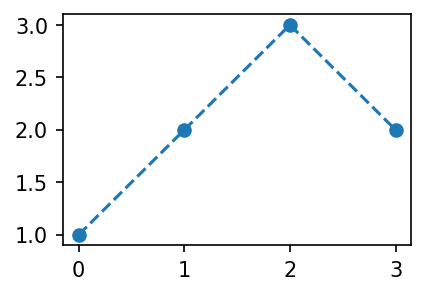

In [70]:
## 코드4
fig = plt.Figure()
ax = fig.add_axes([0.125, 0.11, 0.775, 0.77])
ax.plot([1,2,3,2],'--o')
fig

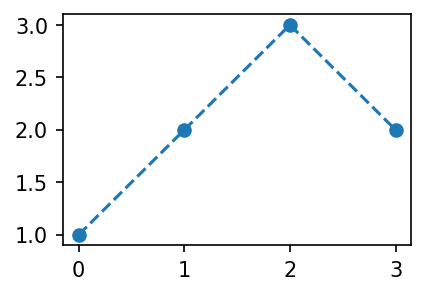

In [71]:
## 코드5
fig = plt.Figure()
ax = fig.add_axes([0.125, 0.11, 0.775, 0.77])
ax.set_xlim([-0.15, 3.15])
ax.set_ylim([0.9, 3.1])
line = matplotlib.lines.Line2D(
    xdata=[0,1,2,3], 
    ydata=[1,2,3,2], 
    linestyle='--', 
    marker='o'
)
ax.add_line(line)
fig

## D. 미니맵

# 4. Subplot

## A. `plt.subplots()`

`-` 예시1

`-` 예시2

## B. `plt.subplot()`

`-` 예시1

# 5. Title

`-` title을 만드는 함수는 어떤 오브젝트에 소속되는게 좋을까?

1.  `plt`
2.  `fig`
3.  `ax`

## A. 일반적인 플랏

### `plt`

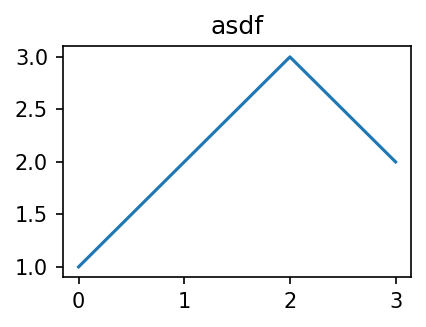

In [47]:
plt.plot([1,2,3,2])
plt.title('asdf')

In [50]:
plt.title??

### `fig` – 원래는 불가능

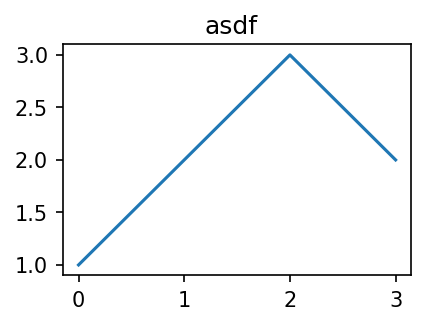

In [49]:
plt.plot([1,2,3,2])
fig = plt.gcf()
fig.suptitle("asdf")

### `ax`

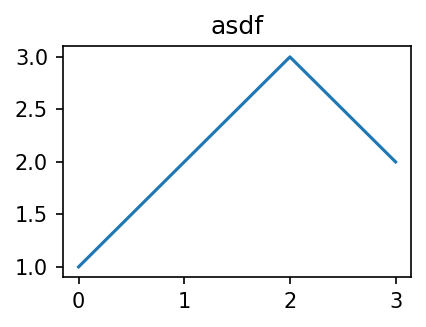

In [54]:
plt.plot([1,2,3,2])
ax = plt.gca()
ax.set_title("asdf")

## B. 서브플랏

### `ax`

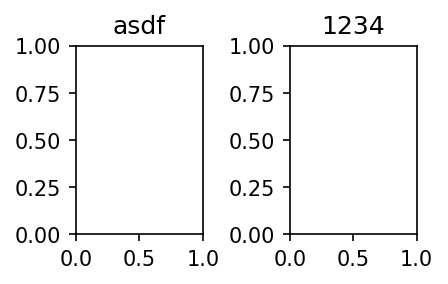

In [60]:
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.set_title('asdf')
ax2.set_title('1234')
fig.tight_layout()

### `plt`

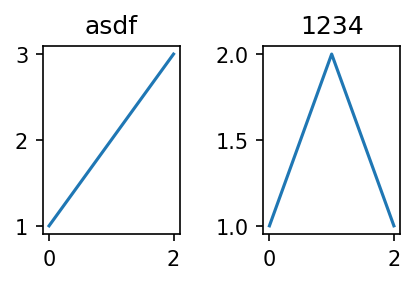

In [62]:
plt.subplot(121)
plt.plot([1,2,3])
plt.title('asdf')
plt.subplot(122)
plt.plot([1,2,1])
plt.title('1234')
plt.tight_layout()

### `fig`

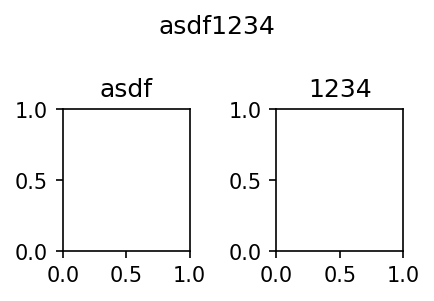

In [64]:
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.set_title('asdf')
ax2.set_title('1234')
fig.suptitle('asdf1234')
fig.tight_layout()

# 6. 산점도 응용예제1 – 표본상관계수

## A. motivating EX

`# 예제` – 키와 몸무게의 산점도

`-` 아래와 같은 자료를 수집하였다고 하자.

-   몸무게 = \[44,48,49,58,62,68,69,70,76,79\]
-   키 = \[159,160,162,165,167,162,165,175,165,172\]

In [59]:
x=[44,48,49,58,62,68,69,70,76,79]
y=[159,160,162,165,167,162,165,175,165,172]

-   키가 큰 사람일수록 몸무게도 많이 나간다. (반대도 성립)
-   키와 몸무게는 관계가 있어보인다. (정비례)

`-` 얼만큼 정비례인지?

-   이 질문에 대답하기 위해서는 상관계수의 개념을 알아야 한다.
-   상관계수는 산점도의 해석에서 가장 중요한 개념 중 하나.

`#`

## B. 예비학습 – 상관계수

`# 예제` – 키와 몸무게에서 상관계수

`-` 다시 아래의 자료를 고려하자.

In [59]:
x=[44,48,49,58,62,68,69,70,76,79]
y=[159,160,162,165,167,162,165,175,165,172]

`-` (표본)상관계수

$$r=\frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}) }{\sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2\sum_{i=1}^{n}(y_i-\bar{y})^2 }}=\sum_{i=1}^{n}\tilde{x}_i\tilde{y}_i $$

-   단,
    $\tilde{x}_i=\frac{(x_i-\bar{x})}{\sqrt{\sum_{i=1}^n(x_i-\bar{x})^2}}$,
    $\tilde{y}_i=\frac{(y_i-\bar{y})}{\sqrt{\sum_{i=1}^n(y_i-\bar{y})^2}}$

`-` 상관계수를 계산하는 방법1

(원래자료)

(평균을 0으로)

(퍼진정도를 표준화)

`-` 상관계수를 계산하는 방법2

`-` 상관계수의 성질: 절대값이 1보다 작다.

`#`

## C. 산점도를 보고 상관계수의 부호를 해석

`# 예제` – 키와 몸무게의 산점도 + 상관계수의 부호해석

`-` 질문: 아래의 그림은 상관계수 $r$의 값이 양수인가 음수인가?

In [16]:
x=[44,48,49,58,62,68,69,70,76,79]
y=[159,160,162,165,167,162,165,175,165,172]

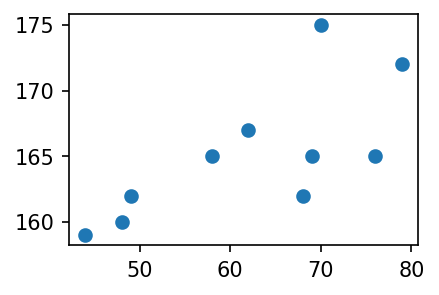

In [17]:
plt.plot(x,y,'o')

`-` 차근차근 따져보자.

-   $\tilde{x}_i$, $\tilde{y}_i$ 를 곱한값이 양수인것과 음수인것을
    체크해보자.
-   양수인쪽이 많은지 음수인쪽이 많은지 생각해보자.
-   $r=\sum_{i=1}^{n}\tilde{x}_i \tilde{y}_i$ 의 부호는?

`-` 그림을 보고 상관계수의 부호를 알아내는 방법? $(x_i,y_i)$의 산점도를
보고 $(\tilde{x}_i, \tilde{y}_i)$ 의 산점도를 상상 $\to$ 1,3 분면에
점들이 많으면 양수, 2,4 분면에 점들이 많으면 음수

`#`

## D. 산점도를 보고 상관계수의 절대값을 해석

`# 예제` – 기울기가 동일, 그렇지만 직선근처의 퍼짐이 다른 경우

`-` 자료가 아래와 같다고 하자.

In [45]:
x=np.arange(0,10,0.1)
y1=x+np.random.normal(loc=0,scale=1.0,size=len(x))
y2=x+np.random.normal(loc=0,scale=7.0,size=len(x))

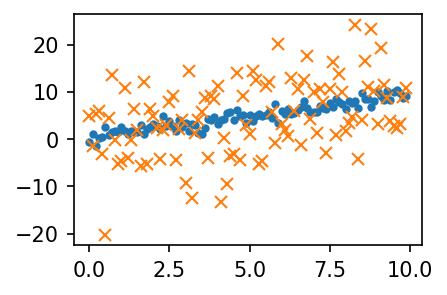

In [46]:
plt.plot(x,y1,'.')
plt.plot(x,y2,'x')

`-` $(x_i,y_i)$의 그래프와 $(\tilde{x}_i,\tilde{y}_i)$의 그래프를
그려보자.

`#`

`# 예제2` – 직선근처의 퍼짐은 동일하지만, 직선의 기울기가 다른 경우

`-` 자료가 아래와 같다고 하자.

In [41]:
x=np.arange(0,10,0.1)
y1=x+np.random.normal(loc=0,scale=1.0,size=len(x))
y2=0.2*x+np.random.normal(loc=0,scale=1.0,size=len(x))

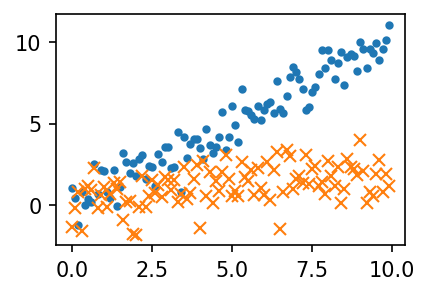

In [42]:
plt.plot(x,y1,'.')
plt.plot(x,y2,'x')

`-` $(x_i,y_i)$의 그래프와 $(\tilde{x}_i,\tilde{y}_i)$의 그래프를
그려보자.

`#`

# 7. 산점도 응용예제2 – 앤스콤의 4분할

`-` Anscombe’s quartet: 교과서에 나오는 그림임.

In [11]:
x1 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

x2 = x1 
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]

x3 = x1 
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]

x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

`-` 교훈1: 데이터를 분석하기 전에 항상 시각화를 하라.

`-` 앤스콤플랏의 4개의 그림은 모두 같은 상관계수를 가진다. $\to$ 하지만
4개의 그림은 느낌이 전혀 다르다.

`-` 같은 표본상관계수를 가진다고 하여 같은 관계성을 가지는 것은 아니다.
표본상관계수는 x,y의 비례정도를 측정하는데 그 값이 1에 가깝다고 하여 꼭
정비례의 관계가 있음을 의미하는게 아니다. $(x_i,y_i)$의 산점도가
선형성을 보일때만 “표본상관계수가 1에 가까우므로 정비례의 관계에 있다”
라는 논리전개가 성립한다.

-   앤스콤의 1번째 플랏: 산점도가 선형 $\to$ 표본상관계수가 0.816 =
    정비례의 관계가 0.816 정도
-   앤스콤의 2번째 플랏: 산점도가 선형이 아님 $\to$ 표본상관계수가 크게
    의미없음
-   앤스콤의 3번째 플랏: 산점도가 선형인듯 보이나 하나의 이상치가 있음
    $\to$ 하나의 이상치가 표본상관계수의 값을 무너뜨릴 수 있으므로
    표본상관계수값을 신뢰할 수 없음.
-   앤스콤의 4번째 플랏: 산점도를 그려보니 이상한 그림 $\to$
    표존상관계수를 계산할수는 있음. 그런데 그게 무슨 의미가 있을지?

`# 예제` – 하나의 이상치가 상관계수를 무너뜨리는 경우

`-` 아래와 같이 앤스콤의 첫번째 플랏을 다시 그려보자.

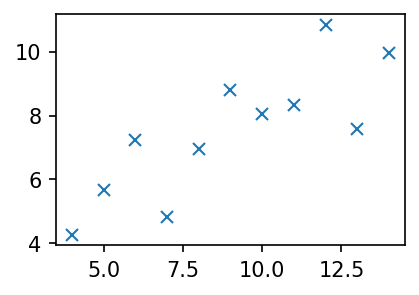

In [231]:
plt.plot(x1,y1,'x')

`-` 하나의 점을 추가하여 이 상관계수 값을 -1에 가깝게 만들 수 있다.

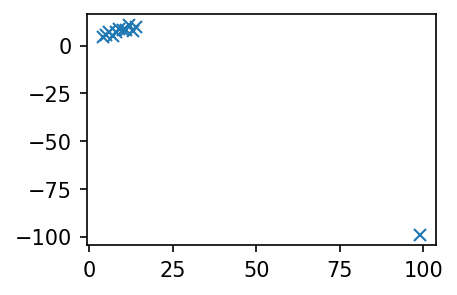

In [232]:
plt.plot(x1+[99],y1+[-99],'x')

In [233]:
np.corrcoef(x1+[99],y1+[-99])

`#`

`-` 교훈2: 상관계수를 해석하기에 앞서서 산점도가 선형성을 보이는지
체크할 것! 항상 통계학과에서 배우는 통계량 (혹은 논리전개)는 적절한
가정하에서만 말이된다는 사실을 기억할 것!

# 8. 산점도 응용예제3 – 무상관은 관계가 없다는 뜻?

`# 예제` – 관계는 있지만 상관관계는 없는 경우

In [234]:
np.random.seed(43052)
x=np.linspace(-1,1,100,endpoint=True)
y=x**2+np.random.normal(scale=0.1,size=100)

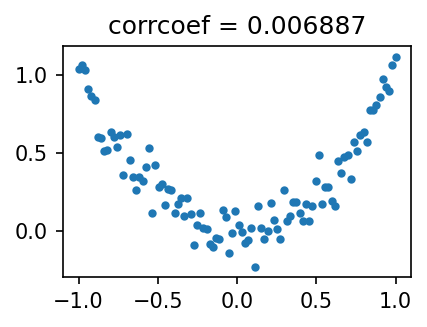

In [241]:
plt.plot(x,y,'.')
plt.title(f'corrcoef = {np.corrcoef(x,y)[0,1] :.6f}')

`#`

> 자연어와 수학용어를 잘 구분할 것

# 8. HW

`1`. 아래와 같은 그림을 그려라.

In [202]:
x,y = [1,2,3,4], [1,2,4,3] 

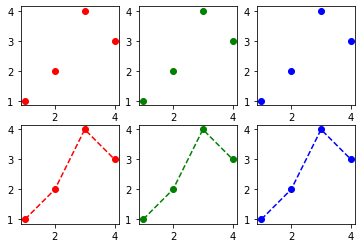

In [206]:
#